In [178]:
import pandas as pd

In [183]:
# download the csv from https://archive.ics.uci.edu/ml/datasets/News+Aggregator
df = pd.read_csv('newsCorpora.csv', sep='\t', names=['ID','TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
URL          422419 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422419 non-null object
STORY        422419 non-null object
HOSTNAME     422419 non-null object
TIMESTAMP    422419 non-null int64
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [185]:
# too many errors when loading via weka if all columns are kept
df = df[['TITLE', 'CATEGORY']].copy()

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 2 columns):
TITLE       422419 non-null object
CATEGORY    422419 non-null object
dtypes: object(2)
memory usage: 6.4+ MB


In [187]:
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather, should not slow taper",b
1,Fed's Charles Plosser sees high bar for change in pace of tapering,b
2,US open: Stocks fall after Fed official hints at accelerated tapering,b
3,"Fed risks falling 'behind the curve', Charles Plosser says",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Growth,b


In [188]:
# remove the quote marks for weka to load the csv without errors
df['TITLE'] = df['TITLE'].str.replace('"', '')
df['TITLE'] = df['TITLE'].str.replace("'", "")

In [189]:
pd.options.display.max_colwidth =2000

In [192]:
df['TITLE'].str.len().describe()

count    422419.000000
mean         56.234750
std          81.648869
min           4.000000
25%          45.000000
50%          56.000000
75%          68.000000
max       28354.000000
Name: TITLE, dtype: float64

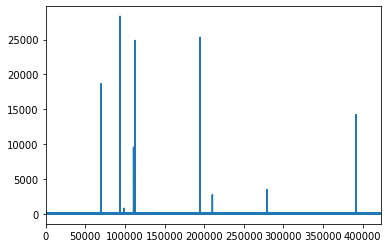

In [191]:
# many long problematic rows
df['TITLE'].str.len().plot()

In [193]:
# remove titles that are longer than 100
df = df[df['TITLE'].str.len()<100]

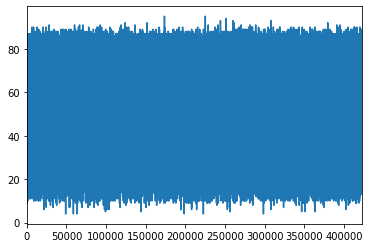

In [194]:
df['TITLE'].str.len().plot()

In [195]:
import csv
df.to_csv('news.csv', index=False, sep=',', quoting=csv.QUOTE_NONNUMERIC)